Use the dataset UsArrests.csv included in this folder to generate a similar
in-depth PCA report of the data. Explore as much as you can, motivate the
pre-processing steps you take, and interpret the outcomes of any analyses.

In [2]:
#ref : https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset/notebook
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

#reading through the UsArrests.csv file
Arrest_df = pd.read_csv('UsArrests.csv', sep = ',')
Arrest_df

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# PCA

In [3]:
#getting a certain part of the dataset
Arrest_df.index = Arrest_df.iloc[:,0]
Arrest_df = Arrest_df.iloc[:,1:5]
Arrest_df.index.name = None
Arrest_df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
#fitting and transforming the data wit pca
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_fit_trans = pca.fit_transform(Arrest_df)

In [8]:
component_df = pd.DataFrame(data = pca_fit_trans, columns= ["First Component","Second Component","Third Component"])
component_df.head()

,First Component,Second Component,Third Component
0,64.802164,11.448007,-2.494933
1,92.827450,17.982943,20.126575
2,124.068216,-8.830403,-1.687448
3,18.340035,16.703911,0.210189
4,107.422953,-22.520070,6.745873


In [28]:
#gettinf the explained variation of pca
print('Explained variation per principal component: \n={}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: 
=[9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]


In [10]:
#fitting the dataset
pca = PCA().fit(Arrest_df)

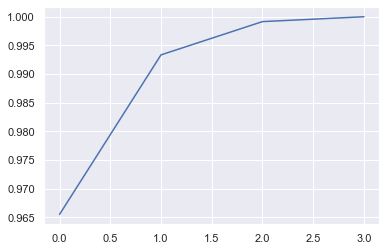

In [11]:
#plotting the explained variation of the dataset
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'Correlation between different fearures')

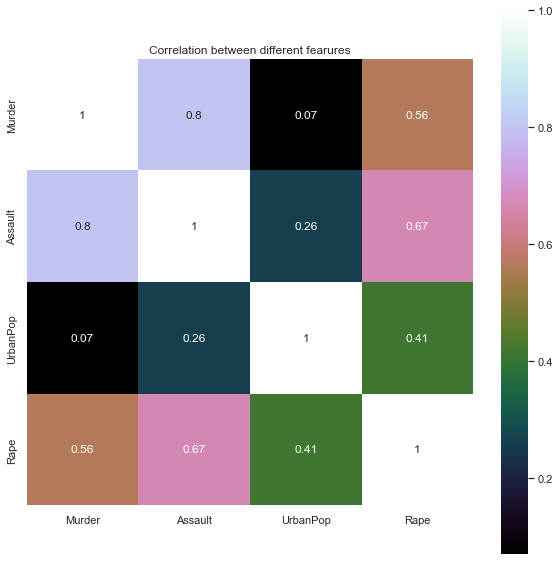

In [16]:
#plotting a correlation of the transformed data
correlation = Arrest_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [21]:
#getting the shape of the data
np.shape(Arrest_df)

(50, 4)

In [25]:
#getting the normalised
feat_cols = ['feature'+str(i) for i in range(Arrest_df.shape[1])]
normalised_arrest = pd.DataFrame(Arrest_df,columns=feat_cols)

normalised_arrest.tail()

,feature0,feature1,feature2,feature3
Virginia,NaN,NaN,NaN,NaN
Washington,NaN,NaN,NaN,NaN
West Virginia,NaN,NaN,NaN,NaN
Wisconsin,NaN,NaN,NaN,NaN
Wyoming,NaN,NaN,NaN,NaN


# You are also required to do an application of two clustering techniques and an analysis of the clusters they generate


K-Mean Clustering

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(Arrest_df_new)
clusters = k_fit.labels_

In [37]:
pd.DataFrame({"States" : Arrest_df_new.index, "Clusters": clusters})[:10]

,States,Clusters
0,0,1
1,1,1
2,2,1
3,3,2
4,4,1
5,5,2
6,6,0
7,7,1
8,8,1
9,9,2


In [39]:
Arrest_df_new["Number of Cluster"] = clusters
Arrest_df_new.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster Number,Number of Cluster
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,1,1
2,8.1,294,80,31.0,1,1
3,8.8,190,50,19.5,2,2
4,9.0,276,91,40.6,1,1
5,7.9,204,78,38.7,2,2
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,1,1
8,15.4,335,80,31.9,1,1
9,17.4,211,60,25.8,2,2


In [40]:
Arrest_df_new["Number of Cluster"] = Arrest_df_new["Number of Cluster"] + 1
Arrest_df_new.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster Number,Number of Cluster
0,13.2,236,58,21.2,1,2
1,10.0,263,48,44.5,1,2
2,8.1,294,80,31.0,1,2
3,8.8,190,50,19.5,2,3
4,9.0,276,91,40.6,1,2
5,7.9,204,78,38.7,2,3
6,3.3,110,77,11.1,0,1
7,5.9,238,72,15.8,1,2
8,15.4,335,80,31.9,1,2
9,17.4,211,60,25.8,2,3


In [44]:
kmeans = KMeans(n_clusters = 6)
k_fit = kmeans.fit(Arrest_df_new)
clusters = k_fit.labels_

In [45]:
pd.DataFrame({"States" : df.index, "Clusters": clusters})[0:10]

,States,Clusters
0,0,0
1,1,0
2,2,4
3,3,5
4,4,0
5,5,5
6,6,3
7,7,0
8,8,4
9,9,5


Hierarchical Clustering

In [47]:
#ref: https://www.kaggle.com/code/ahmetengindoan/usarrests-prediction-using-unsupervised-learning/notebook
from scipy.cluster.hierarchy import linkage

#setting for complete, average and single hierachy cluster
hierarchy_complete = linkage( Arrest_df_new, "complete")
hierarchy_average = linkage( Arrest_df_new, "average")
hierarchy_single = linkage( Arrest_df_new, "single")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 102.86155744494636, 102.86155744494636, 0.0],
  [0.0, 168.63513868704825, 168.63513868704825, 0.0],
  [102.86155744494636,
   293.62615687298705,
   293.62615687298705,
   168.63513868704825]],
 'ivl': ['(2)', '(14)', '(14)', '(20)'],
 'leaves': [88, 93, 94, 95],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

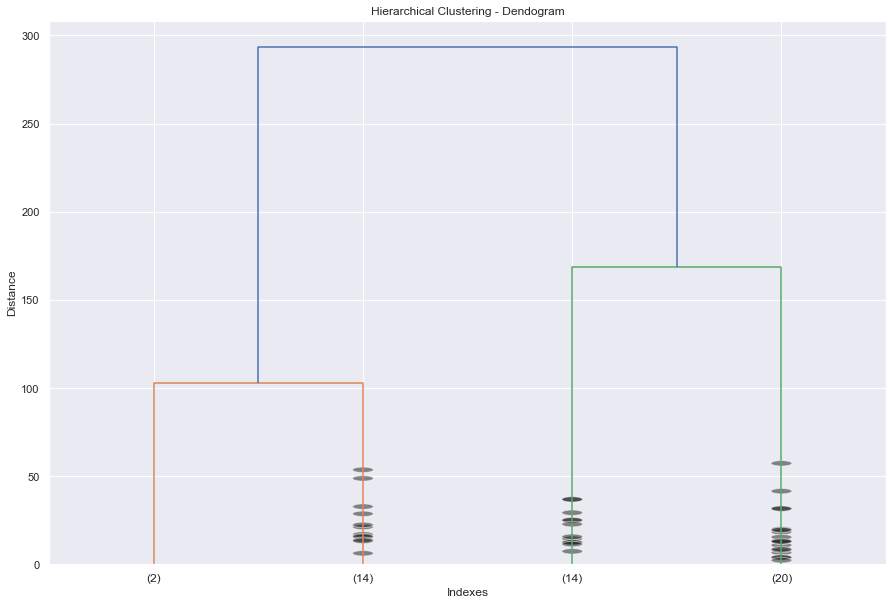

In [51]:
#plotting the complete hierarchy cluster
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram(
    hierarchy_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True)

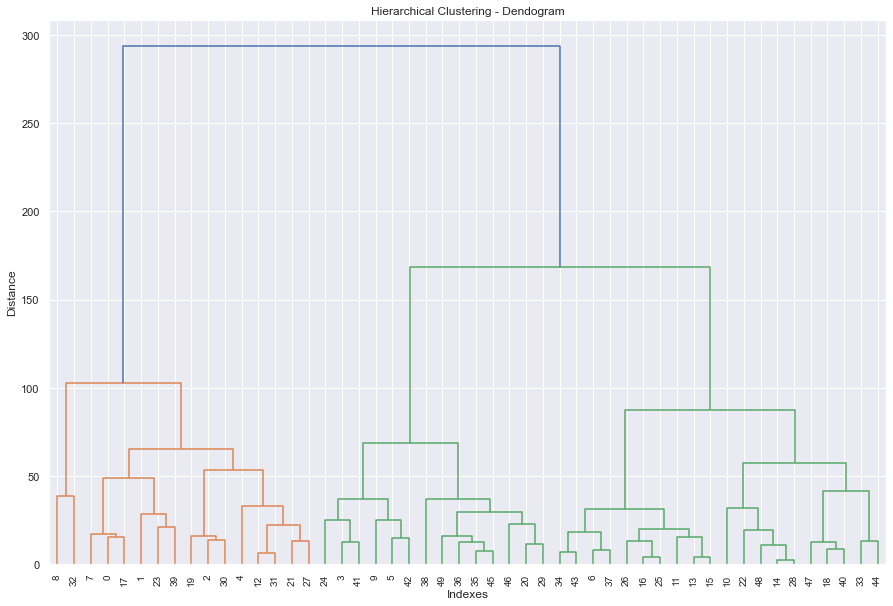

In [52]:
#plotting the complete hierarchy cluster
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
den = dendrogram(
    hierarchy_complete,
    leaf_font_size=10)

In [54]:
#performing a prediction for the AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters = 6, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(Arrest_df_new)

array([1, 1, 0, 5, 0, 5, 3, 1, 0, 5, 4, 3, 1, 3, 4, 3, 3, 1, 4, 0, 2, 1,
       4, 1, 5, 3, 3, 1, 4, 2, 0, 1, 0, 4, 3, 2, 2, 3, 2, 1, 4, 5, 5, 3,
       4, 2, 2, 4, 4, 2], dtype=int64)

In [55]:
#getting the Cluster and their states for the dataset
pd.DataFrame({"Positions" : Arrest_df_new.index, "Clusters": cluster.fit_predict(Arrest_df_new)})[0:10]

,States,Clusters
0,0,1
1,1,1
2,2,0
3,3,5
4,4,0
5,5,5
6,6,3
7,7,1
8,8,0
9,9,5


In [58]:
#getting the Cluster number for the dataset
Arrest_df_new["Cluster number"] = cluster.fit_predict(Arrest_df_new)
Arrest_df_new.head()

,Murder,Assault,UrbanPop,Rape,Cluster Number,Number of Cluster,Cluster number
0,13.2,236,58,21.2,1,2,1
1,10.0,263,48,44.5,1,2,1
2,8.1,294,80,31.0,1,2,0
3,8.8,190,50,19.5,2,3,5
4,9.0,276,91,40.6,1,2,0


Push all the work that you have generated for this project to GitHub